In [20]:
import numpy as np
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuit import EnsemblePursuit
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [26]:
def simulate_data(nr_components,nr_timepoints,nr_neurons):
    k=5
    theta=1./5
    zeros_for_U=np.random.choice([0,1], nr_neurons*nr_components, p=[1-0.01, 0.01]).reshape((nr_neurons,nr_components))
    U=np.random.gamma(shape=k,scale=theta,size=(nr_neurons,nr_components))
    U=U*zeros_for_U
    V=np.random.normal(loc=0,scale=1,size=(nr_components,nr_timepoints))
    X=U@V
    #X=zscore(X,axis=1)
    U_orig=U
    V_orig=V
    plt.hist(np.sum(zeros_for_U,axis=0))
    plt.show()
    return X

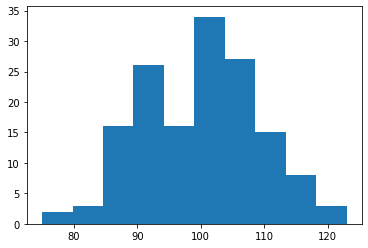

In [27]:
X=simulate_data(150,5000,10000)

In [29]:
print(X.shape)
print(X)

(10000, 5000)
[[ 2.68442732 -1.7996758  -2.92554016 ... -2.23911711  2.16446135
   0.89911277]
 [-0.95601731 -0.70335656 -0.49209705 ... -2.76459334 -0.96113019
   0.8130594 ]
 [ 0.27490815 -3.55970664  0.3752225  ... -1.72152775 -1.93915469
  -2.64332731]
 ...
 [-1.0082174   1.90048303 -2.06261284 ...  0.85856906  2.25988228
   1.57923402]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.87751544 -2.29600014  0.7672494  ...  3.06829787 -0.40606182
   0.45110946]]


In [31]:
ep=EnsemblePursuit(n_components=150,lam=0.01)
U,V=ep.fit(X.T)

obtained 25 PCs in 1.5497 seconds
initialized 25 clusters with k-means in 1.4664 seconds
ensemble 0, time 0.22, nr neurons 117, EV 0.2289
ensemble 25, time 5.55, nr neurons 99, EV 0.3780
ensemble 50, time 9.23, nr neurons 0, EV 0.4362
ensemble 75, time 12.10, nr neurons 0, EV 0.4362
ensemble 100, time 14.96, nr neurons 0, EV 0.4362
ensemble 125, time 17.83, nr neurons 0, EV 0.4362
ensemble 149, time 20.58, nr neurons 0, EV 0.4362
average sparsity is 0.0027


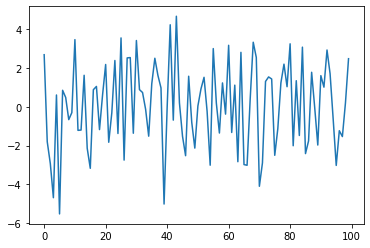

In [32]:
plt.plot(X[0,:100])

(10000, 5000)


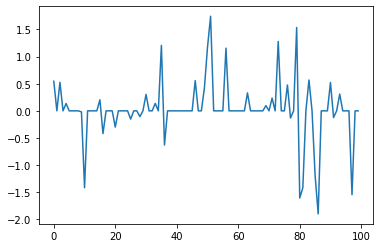

In [44]:
approx=U@V.T
print(approx.shape)
plt.plot(approx.T[0,:100])

In [37]:
from scipy import io
dat=io.loadmat('/home/maria/Documents/EnsemblePursuit/experiments/natimg2800_M170717_MP034_2017-09-11.mat')['stim'][0]['resp'][0]

In [39]:
print(dat.shape)
dat=zscore(dat,axis=0)

(5880, 10103)


/home/maria/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/home/maria/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


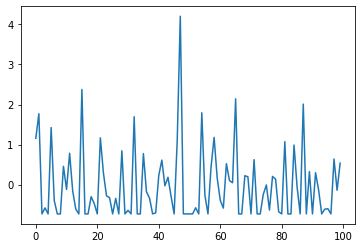

In [40]:
plt.plot(dat[:100,0])